In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [2]:
apple = pd.read_csv('AAPL.csv')
facebook = pd.read_csv('FB.csv')
google = pd.read_csv("GOOGL.csv")
nvidia = pd.read_csv("NVDA.csv")
tesla = pd.read_csv('TSLA.csv')
twitter = pd.read_csv('TWTR.csv')

In [3]:
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


In [4]:
facebook.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [5]:
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000
1,2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
2,2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
3,2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600


In [6]:
nvidia.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,1.750000,1.953125,1.552083,1.640625,1.509998,67867200.0
1,1999-01-25,1.770833,1.833333,1.640625,1.812500,1.668188,12762000.0
2,1999-01-26,1.833333,1.869792,1.645833,1.671875,1.538759,8580000.0
3,1999-01-27,1.677083,1.718750,1.583333,1.666667,1.533965,6109200.0
4,1999-01-28,1.666667,1.677083,1.651042,1.661458,1.529172,5688000.0


In [7]:
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [8]:
twitter.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701600
1,2013-11-08,45.930000,46.939999,40.689999,41.650002,41.650002,27925300
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113900
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316700
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688300


In [9]:
dfs = [apple, facebook, google, nvidia, tesla, twitter]

In [10]:
for df in dfs:
    df['MA50'] = df.Close.rolling(50).mean()
    df['MA200'] = df.Close.rolling(200).mean()

In [11]:
apple.head(200)

,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA200
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400,NaN,NaN
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200,NaN,NaN
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000,NaN,NaN
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400,NaN,NaN
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400,NaN,NaN
...,...,...,...,...,...,...,...,...,...
195,1981-09-23,0.299107,0.299107,0.294643,0.294643,0.233457,7050400,0.389018,NaN
196,1981-09-24,0.294643,0.294643,0.292411,0.292411,0.231689,4575200,0.386384,NaN
197,1981-09-25,0.258929,0.258929,0.254464,0.254464,0.201622,8652000,0.382768,NaN
198,1981-09-28,0.256696,0.258929,0.256696,0.256696,0.203391,22932000,0.378973,NaN


In [12]:
for df in dfs:
    df['Previous day close price'] = df.Close.shift(1)

In [13]:
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA200,Previous day close price
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400,NaN,NaN,NaN
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200,NaN,NaN,0.513393
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000,NaN,NaN,0.486607
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400,NaN,NaN,0.450893
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400,NaN,NaN,0.462054


In [14]:
for df in dfs:
    df['Change in price'] = df['Close'] - df['Previous day close price']

In [15]:
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA200,Previous day close price,Change in price
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400,NaN,NaN,NaN,NaN
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200,NaN,NaN,0.513393,-0.026786
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000,NaN,NaN,0.486607,-0.035714
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400,NaN,NaN,0.450893,0.011161
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400,NaN,NaN,0.462054,0.013393


In [16]:
for df in dfs:
    df['Percent change in price'] = df.Close.pct_change()

In [17]:
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA200,Previous day close price,Change in price,Percent change in price
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400,NaN,NaN,NaN,NaN,NaN
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200,NaN,NaN,0.513393,-0.026786,-0.052174
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000,NaN,NaN,0.486607,-0.035714,-0.073394
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400,NaN,NaN,0.450893,0.011161,0.024752
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400,NaN,NaN,0.462054,0.013393,0.028986


In [18]:
for df in dfs:
    df['Previous day volume'] = df.Volume.shift(1)

In [19]:
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA200,Previous day close price,Change in price,Percent change in price,Previous day volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400,NaN,NaN,NaN,NaN,NaN,NaN
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200,NaN,NaN,0.513393,-0.026786,-0.052174,117258400.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000,NaN,NaN,0.486607,-0.035714,-0.073394,43971200.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400,NaN,NaN,0.450893,0.011161,0.024752,26432000.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400,NaN,NaN,0.462054,0.013393,0.028986,21610400.0


In [20]:
for df in dfs:
    df['Change in volume'] = df['Volume'] - df['Previous day volume']

In [21]:
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA200,Previous day close price,Change in price,Percent change in price,Previous day volume,Change in volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200,NaN,NaN,0.513393,-0.026786,-0.052174,117258400.0,-73287200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000,NaN,NaN,0.486607,-0.035714,-0.073394,43971200.0,-17539200.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400,NaN,NaN,0.450893,0.011161,0.024752,26432000.0,-4821600.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400,NaN,NaN,0.462054,0.013393,0.028986,21610400.0,-3248000.0


In [22]:
for df in dfs:
    df['Percent change in volume'] = df.Volume.pct_change()

In [23]:
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA200,Previous day close price,Change in price,Percent change in price,Previous day volume,Change in volume,Percent change in volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200,NaN,NaN,0.513393,-0.026786,-0.052174,117258400.0,-73287200.0,-0.625006
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000,NaN,NaN,0.486607,-0.035714,-0.073394,43971200.0,-17539200.0,-0.398879
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400,NaN,NaN,0.450893,0.011161,0.024752,26432000.0,-4821600.0,-0.182415
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400,NaN,NaN,0.462054,0.013393,0.028986,21610400.0,-3248000.0,-0.150298


In [25]:
# Feature engineering and setting Date as index
apple['Date'] = pd.to_datetime(apple['Date'])
apple.set_index('Date', inplace=True)


In [26]:
# Train-test split
train, test = train_test_split(apple, test_size=3, shuffle=False)
# Model training
model = ARIMA(train['Close'], order=(5,1,0))
model_fit = model.fit()

D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [27]:
# Model evaluation
predictions = model_fit.forecast(steps=len(test))
mse = mean_squared_error(test['Close'], predictions)
rmse = mse ** 0.5
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 6.53139225862463


D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [28]:
# Prediction
future_steps = 3
future_forecast = model_fit.forecast(steps=future_steps)

D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


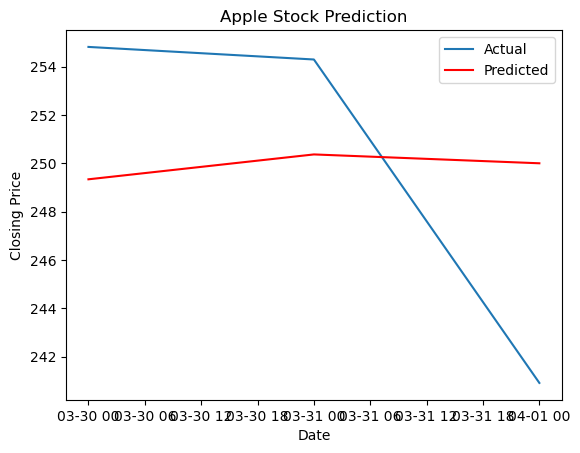

In [29]:
# Analysis and visualization (plotting)
# Plot actual vs predicted values
import matplotlib.pyplot as plt
plt.plot(test.index, test['Close'], label='Actual')
plt.plot(test.index, predictions, color='red', label='Predicted')
plt.title('Apple Stock Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [30]:
facebook.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA200,Previous day close price,Change in price,Percent change in price,Previous day volume,Change in volume,Percent change in volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,NaN,NaN,38.230000,-4.200001,-0.109861,573576400.0,-405383700.0,-0.706765
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,NaN,NaN,34.029999,-3.029999,-0.089039,168192700.0,-66406100.0,-0.394822
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,NaN,NaN,31.000000,1.000000,0.032258,101786600.0,-28186600.0,-0.276919
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,NaN,NaN,32.000000,1.029999,0.032187,73600000.0,-23362800.0,-0.317429


In [31]:
# Feature engineering and setting Date as index
facebook['Date'] = pd.to_datetime(facebook['Date'])
facebook.set_index('Date', inplace=True)

In [32]:
# Train-test split
train, test = train_test_split(facebook, test_size=3, shuffle=False)
# Model training
model = ARIMA(train['Close'], order=(5,1,0))
model_fit = model.fit()

D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [33]:
# Model evaluation
predictions = model_fit.forecast(steps=len(test))
mse = mean_squared_error(test['Close'], predictions)
rmse = mse ** 0.5
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 7.7483407225529275


D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [34]:
# Prediction
future_steps = 3
future_forecast = model_fit.forecast(steps=future_steps)

D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


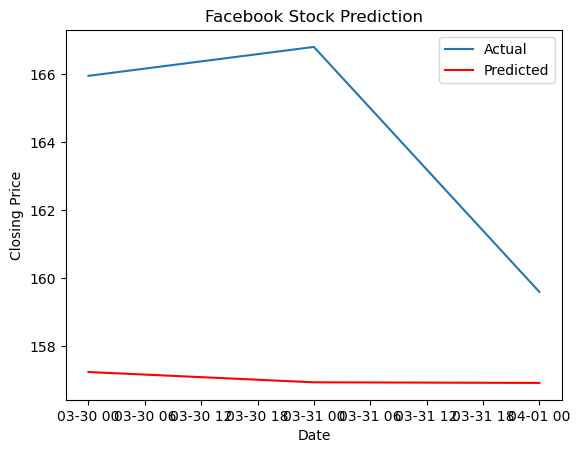

In [35]:
# Analysis and visualization (plotting)
# Plot actual vs predicted values
import matplotlib.pyplot as plt
plt.plot(test.index, test['Close'], label='Actual')
plt.plot(test.index, predictions, color='red', label='Predicted')
plt.title('Facebook Stock Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## Now, For Google stock

In [36]:
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA200,Previous day close price,Change in price,Percent change in price,Previous day volume,Change in volume,Percent change in volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300,NaN,NaN,50.220219,3.988991,0.079430,44659000.0,-21824700.0,-0.488697
2,2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100,NaN,NaN,54.209209,0.545544,0.010064,22834300.0,-4578200.0,-0.200497
3,2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300,NaN,NaN,54.754753,-2.267265,-0.041408,18256100.0,-3008800.0,-0.164811
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600,NaN,NaN,52.487488,0.565567,0.010775,15247300.0,-6058700.0,-0.397362


In [37]:
# Feature engineering and setting Date as index
google['Date'] = pd.to_datetime(google['Date'])
google.set_index('Date', inplace=True)

In [38]:
# Train-test split
train, test = train_test_split(google, test_size=3, shuffle=False)
# Model training
model = ARIMA(train['Close'], order=(5,1,0))
model_fit = model.fit()

D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [39]:
# Model evaluation
predictions = model_fit.forecast(steps=len(test))
mse = mean_squared_error(test['Close'], predictions)
rmse = mse ** 0.5
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 33.363526148758346


D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [40]:
# Prediction
future_steps = 3
future_forecast = model_fit.forecast(steps=future_steps)

D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


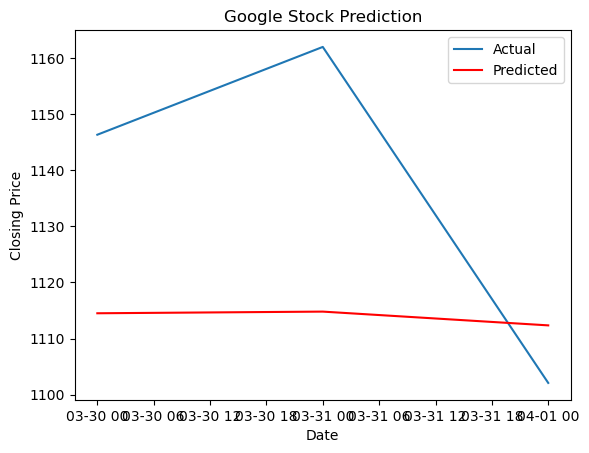

In [41]:
# Analysis and visualization (plotting)
# Plot actual vs predicted values
import matplotlib.pyplot as plt
plt.plot(test.index, test['Close'], label='Actual')
plt.plot(test.index, predictions, color='red', label='Predicted')
plt.title('Google Stock Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## Now, For Nvidia Stock

In [42]:
nvidia.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA200,Previous day close price,Change in price,Percent change in price,Previous day volume,Change in volume,Percent change in volume
0,1999-01-22,1.750000,1.953125,1.552083,1.640625,1.509998,67867200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1999-01-25,1.770833,1.833333,1.640625,1.812500,1.668188,12762000.0,NaN,NaN,1.640625,0.171875,0.104762,67867200.0,-55105200.0,-0.811956
2,1999-01-26,1.833333,1.869792,1.645833,1.671875,1.538759,8580000.0,NaN,NaN,1.812500,-0.140625,-0.077586,12762000.0,-4182000.0,-0.327692
3,1999-01-27,1.677083,1.718750,1.583333,1.666667,1.533965,6109200.0,NaN,NaN,1.671875,-0.005208,-0.003115,8580000.0,-2470800.0,-0.287972
4,1999-01-28,1.666667,1.677083,1.651042,1.661458,1.529172,5688000.0,NaN,NaN,1.666667,-0.005208,-0.003125,6109200.0,-421200.0,-0.068945


In [43]:
# Feature engineering and setting Date as index
nvidia['Date'] = pd.to_datetime(nvidia['Date'])
nvidia.set_index('Date', inplace=True)

In [44]:
# Train-test split
train, test = train_test_split(nvidia, test_size=3, shuffle=False)
# Model training
model = ARIMA(train['Close'], order=(5,1,0))
model_fit = model.fit()

D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [45]:
# Model evaluation
predictions = model_fit.forecast(steps=len(test))
mse = mean_squared_error(test['Close'], predictions)
rmse = mse ** 0.5
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 10.922451155309295


D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [46]:
# Prediction
future_steps = 3
future_forecast = model_fit.forecast(steps=future_steps)

D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


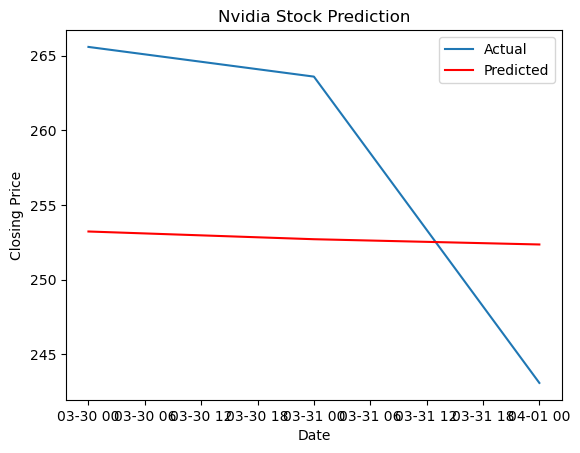

In [47]:
# Analysis and visualization (plotting)
# Plot actual vs predicted values
import matplotlib.pyplot as plt
plt.plot(test.index, test['Close'], label='Actual')
plt.plot(test.index, predictions, color='red', label='Predicted')
plt.title('Nvidia Stock Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## Now, For tesla stock

In [48]:
# Feature engineering and setting Date as index
tesla['Date'] = pd.to_datetime(tesla['Date'])
tesla.set_index('Date', inplace=True)

In [49]:
# Train-test split
train, test = train_test_split(tesla, test_size=3, shuffle=False)
# Model training
model = ARIMA(train['Close'], order=(5,1,0))
model_fit = model.fit()

# Model evaluation
predictions = model_fit.forecast(steps=len(test))
mse = mean_squared_error(test['Close'], predictions)
rmse = mse ** 0.5
print('Root Mean Squared Error:', rmse)

D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Root Mean Squared Error: 18.00967373449161


D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [50]:
# Prediction
future_steps = 3
future_forecast = model_fit.forecast(steps=future_steps)

D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


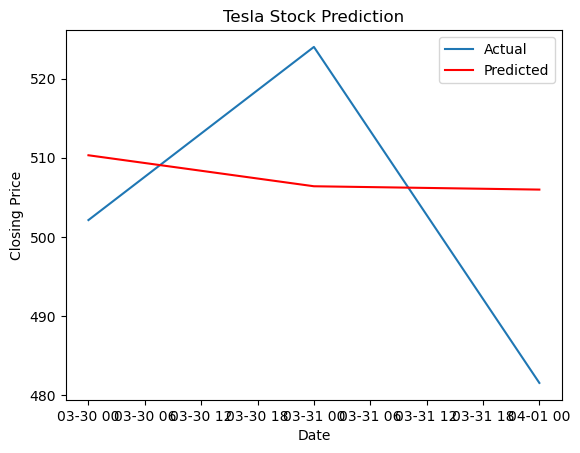

In [51]:
# Analysis and visualization (plotting)
# Plot actual vs predicted values
import matplotlib.pyplot as plt
plt.plot(test.index, test['Close'], label='Actual')
plt.plot(test.index, predictions, color='red', label='Predicted')
plt.title('Tesla Stock Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## Now, For Twitter stock

In [52]:
twitter.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA200,Previous day close price,Change in price,Percent change in price,Previous day volume,Change in volume,Percent change in volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-11-08,45.930000,46.939999,40.689999,41.650002,41.650002,27925300,NaN,NaN,44.900002,-3.250000,-0.072383,117701600.0,-89776300.0,-0.762745
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113900,NaN,NaN,41.650002,1.250000,0.030012,27925300.0,-11811400.0,-0.422964
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316700,NaN,NaN,42.900002,-1.000000,-0.023310,16113900.0,-9797200.0,-0.607997
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688300,NaN,NaN,41.900002,0.699997,0.016706,6316700.0,2371600.0,0.375449


In [53]:
# Feature engineering and setting Date as index
twitter['Date'] = pd.to_datetime(twitter['Date'])
twitter.set_index('Date', inplace=True)

In [54]:
# Train-test split
train, test = train_test_split(twitter, test_size=3, shuffle=False)
# Model training
model = ARIMA(train['Close'], order=(5,1,0))
model_fit = model.fit()

# Model evaluation
predictions = model_fit.forecast(steps=len(test))
mse = mean_squared_error(test['Close'], predictions)
rmse = mse ** 0.5
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 1.1952142180077177


D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [55]:
# Prediction
future_steps = 3
future_forecast = model_fit.forecast(steps=future_steps)

D:\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


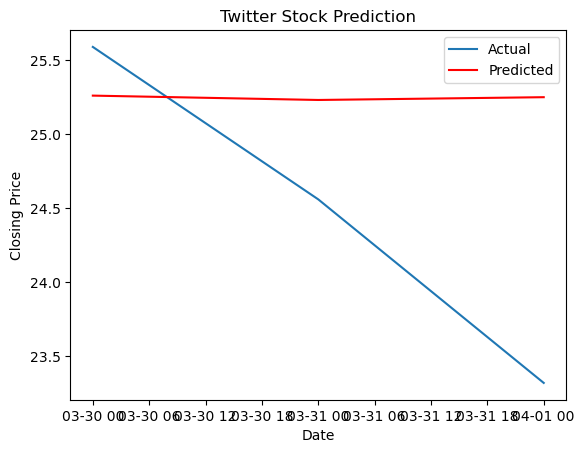

In [56]:
# Analysis and visualization (plotting)
# Plot actual vs predicted values
import matplotlib.pyplot as plt
plt.plot(test.index, test['Close'], label='Actual')
plt.plot(test.index, predictions, color='red', label='Predicted')
plt.title('Twitter Stock Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [57]:
apple.to_csv('Apple.csv')
facebook.to_csv('Facebook.csv')
google.to_csv('Google.csv')
nvidia.to_csv('Nvidia.csv')
tesla.to_csv('Tesla.csv')
twitter.to_csv('Twitter.csv')